# 데이터 불러오기 및 Neural Network 적합

In [1]:
X = [[0, 0], [1, 1]]
y = [[0, 1], [1, 1]]

* 함수 불러오기

In [2]:
from sklearn.neural_network import MLPClassifier

* 모델 적합

In [3]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                    hidden_layer_sizes=(5, 2), random_state=1)  # 5개 노드 x 2개 노드 로 이루어진 2층의 hidden layer 

In [4]:
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [5]:
clf.predict([[2., 2.], [-1., -2.]])

array([[1, 1],
       [0, 1]])

In [6]:
clf.coefs_  # 각각의 node에서의 weight가 나타남

[array([[-0.15011367, -0.62860541, -0.90433213, -3.45938109, -0.63904618],
        [-0.73749132, -1.5947694 , -0.2793927 , -3.28854097,  0.0702225 ]]),
 array([[ 0.30838904, -0.14960207],
        [ 3.14928608, -0.65056811],
        [-0.54615798,  0.54407041],
        [ 4.36386369, -0.33753023],
        [ 0.34792663,  0.68091737]]),
 array([[-3.58233912,  2.68515229],
        [ 0.9049651 , -0.96123048]])]

In [7]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 2)]

# 모델의 복잡도에 따른 퍼포먼스 비교

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

In [10]:
h = .02
alphas = np.logspace(-5, 3, 5)  # start ~ end 사이에서 로그배율을 이용하여 값 생성
names = ['alpha' + str(i) for i in alphas]

In [11]:
alphas

array([1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03])

In [12]:
names

['alpha1e-05', 'alpha0.001', 'alpha0.1', 'alpha10.0', 'alpha1000.0']

In [13]:
classifiers = []
for i in alphas:   # alpha를 각각 다르게 설정한 classifiers
    classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1,
                                    max_iter=3000, hidden_layer_sizes=[100, 100]))

In [14]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                          random_state=0, n_clusters_per_class=1)

In [15]:
pd.DataFrame(X).head()

,0,1
0,-0.605416,1.296708
1,1.354900,-0.046877
2,1.780375,1.099858
3,1.436615,0.807641
4,0.721669,1.168160


In [16]:
pd.DataFrame(y).head()

,0
0,1
1,0
2,1
3,1
4,1


In [17]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)  # uniform error 추가
linearly_separable = (X, y)  # X + y 데이터 묶어서 생성

* 여러 모양의 추가 데이터셋 생성

In [18]:
datasets = [make_moons(noise=0.3, random_state=0),
           make_circles(noise=0.2, factor=0.5, random_state=1),
           linearly_separable]

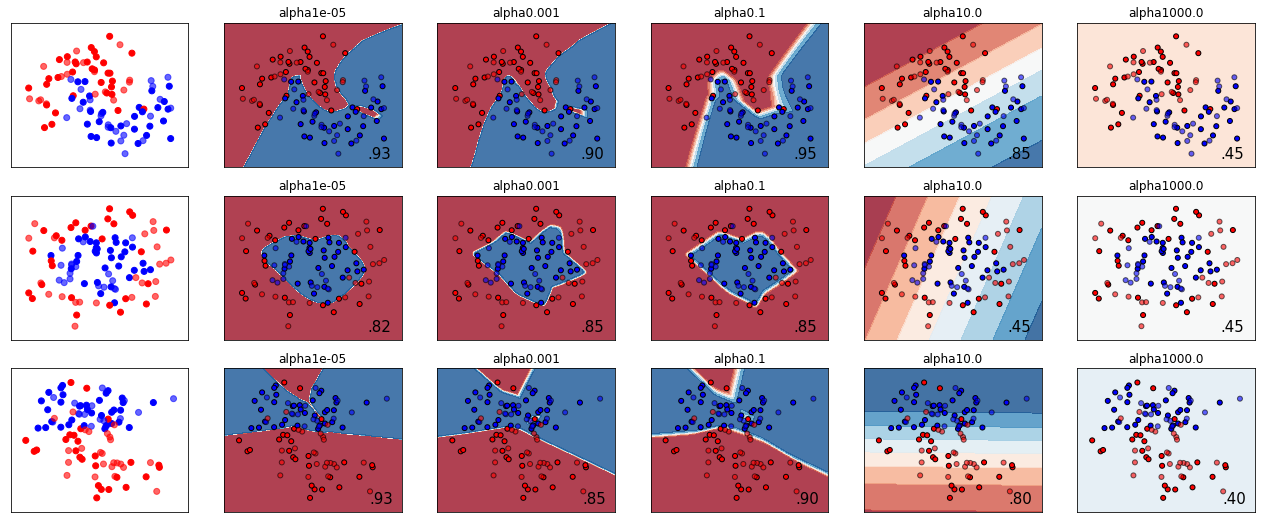

In [19]:
figure = plt.figure(figsize=(18, 9))
i = 1
for X, y in datasets:  # datasets 안의 데이터들을 순회 moon -> circle -> classification
    X = StandardScaler().fit_transform(X)   # X 표준화해서 넣어줌
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)   # 데이터 분할

    # min/max 계산  ->  grid 만들기
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()